In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

from cp import PsychroChart, load_config
from cp.chart import gen_points_in_constant_relative_humidity,GetStandardAtmPressure

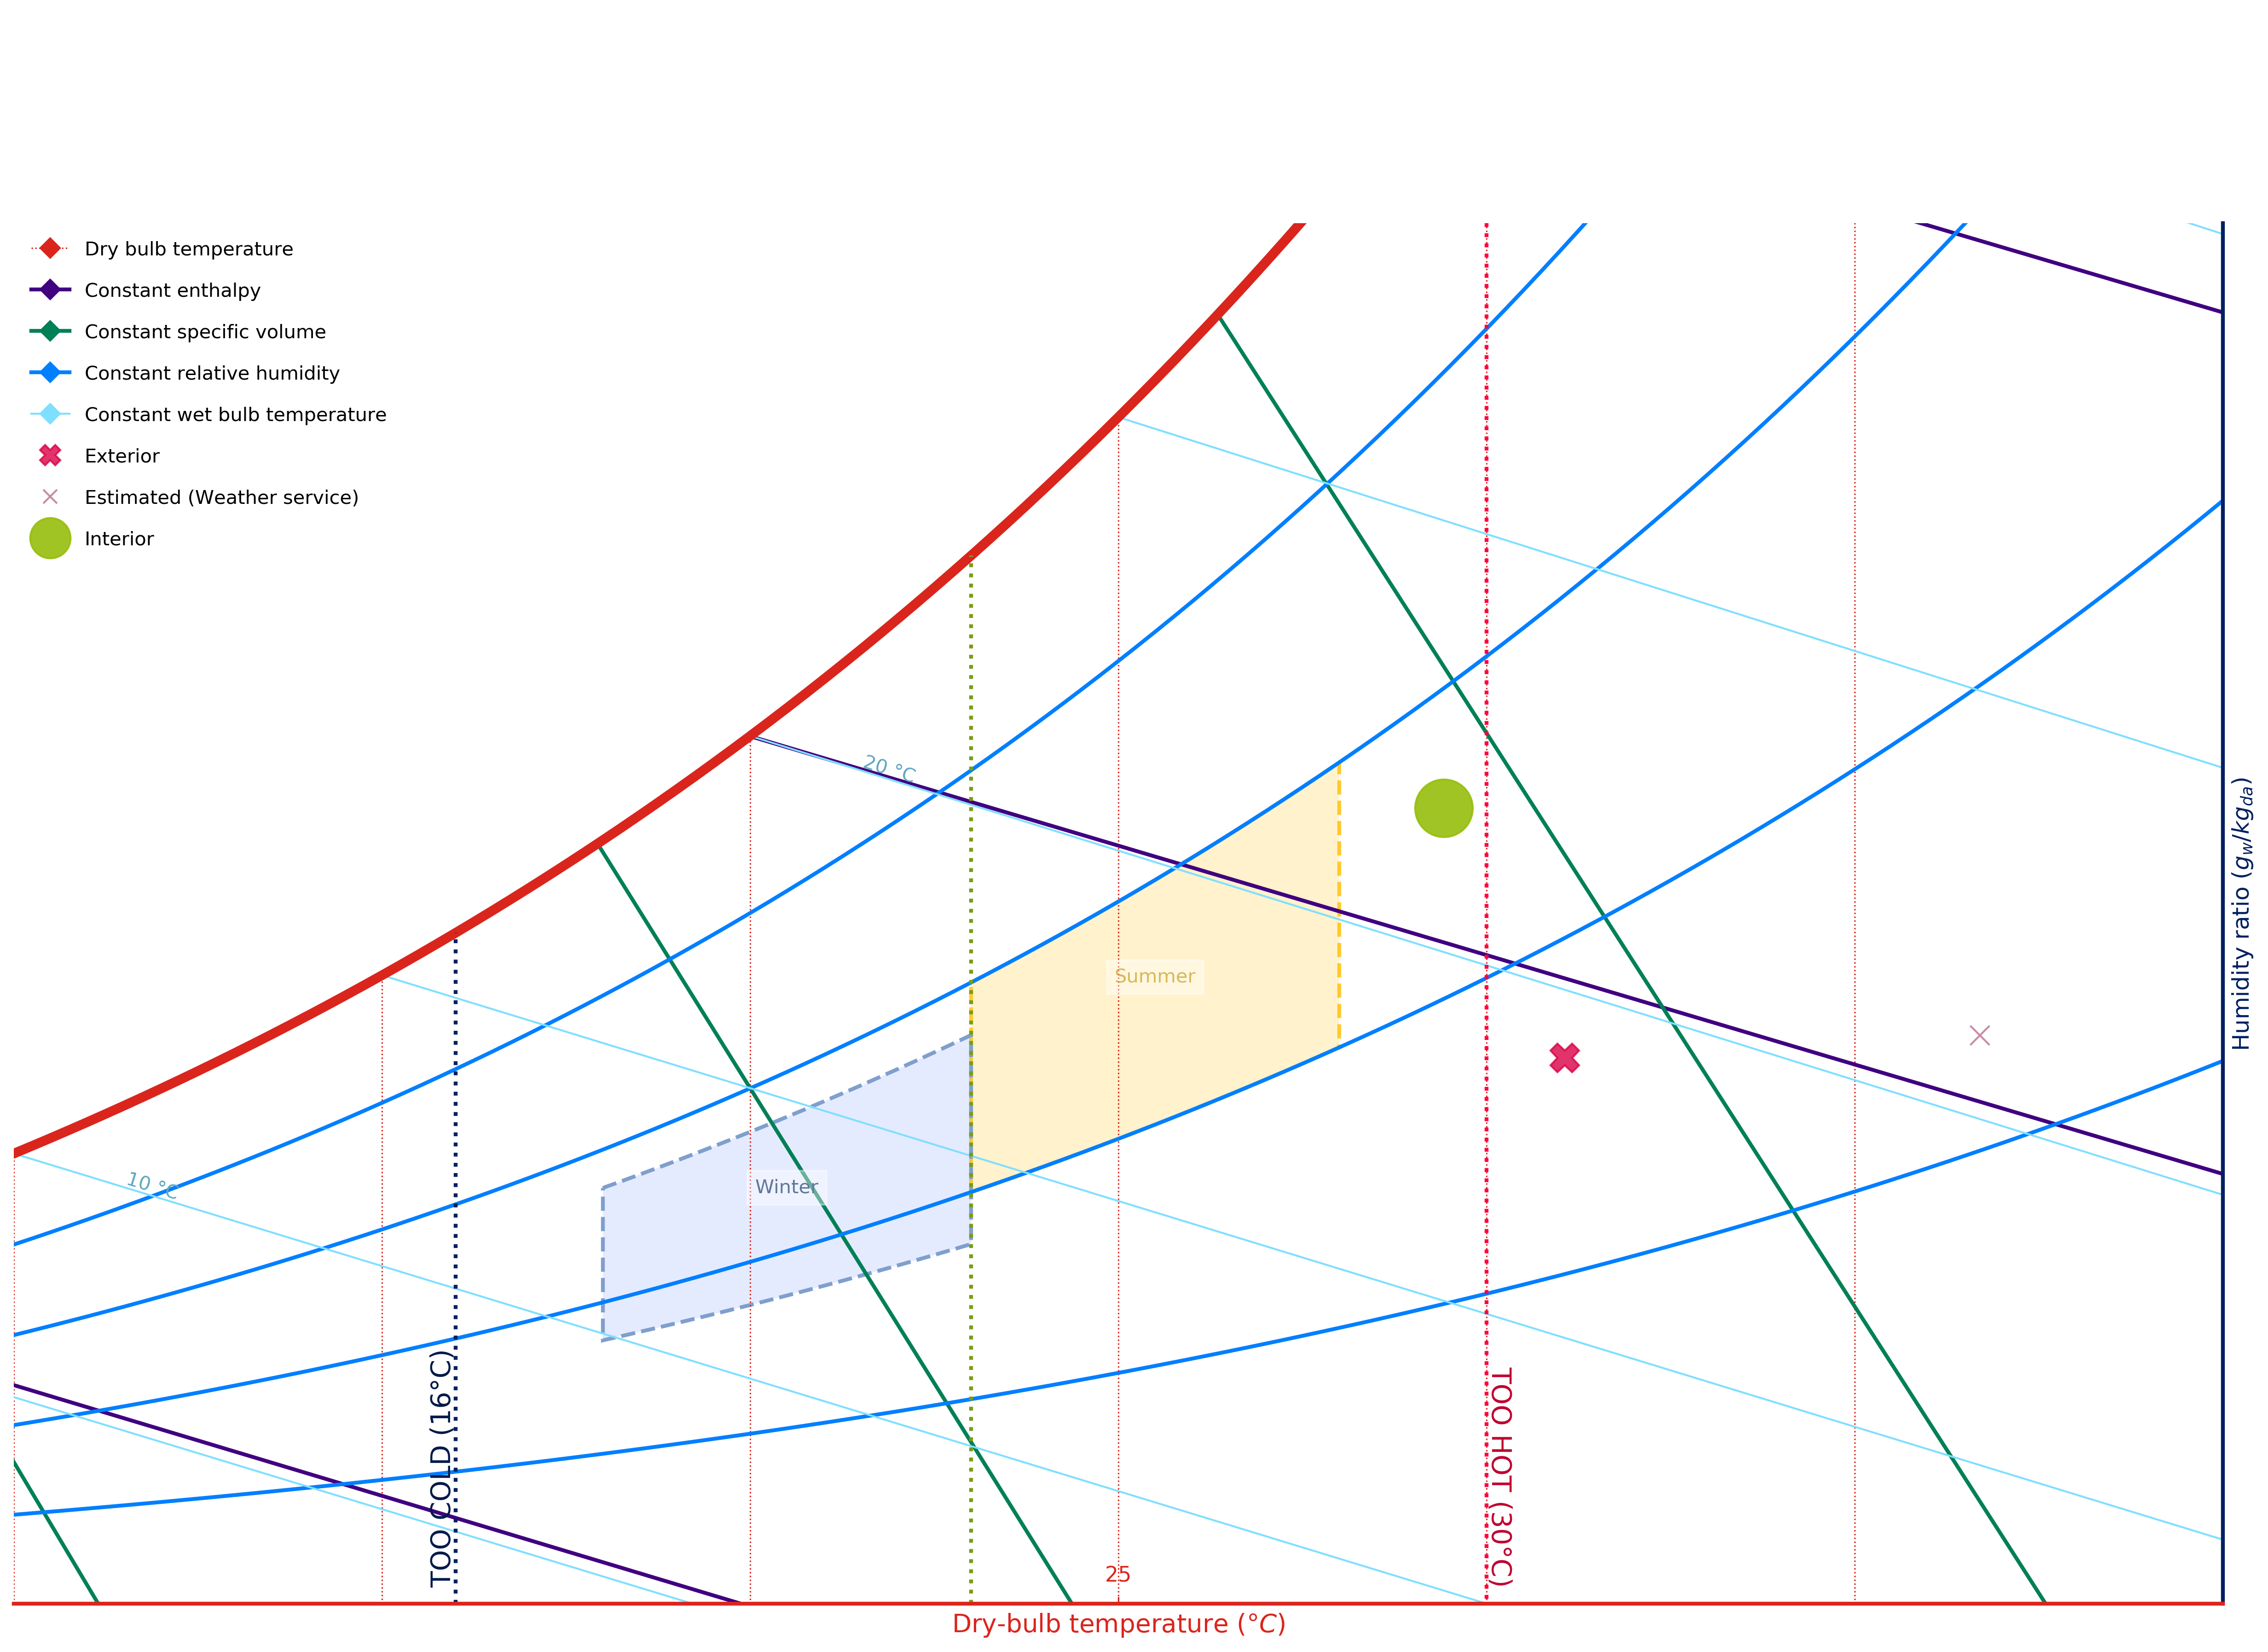

In [50]:
# Get a preconfigured chart
chart = PsychroChart("minimal")
# Append zones:
zones_conf = {
    "zones":[{
            "zone_type": "dbt-rh",
            "style": {"edgecolor": [1.0, 0.749, 0.0, 0.8],
                      "facecolor": [1.0, 0.749, 0.0, 0.2],
                      "linewidth": 2,
                      "linestyle": "--"},
            "points_x": [23, 28],
            "points_y": [40, 60],
            "label": "Summer"
        },
        {
            "zone_type": "dbt-rh",
            "style": {"edgecolor": [0.498, 0.624, 0.8],
                      "facecolor": [0.498, 0.624, 1.0, 0.2],
                      "linewidth": 2,
                      "linestyle": "--"},
            "points_x": [18, 23],
            "points_y": [35, 55],
            "label": "Winter"
        }]}
chart.append_zones(zones_conf)

# Plot the chart
ax = chart.plot()

# Add Vertical lines
t_min, t_opt, t_max = 16, 23, 30
chart.plot_vertical_dry_bulb_temp_line(
    t_min, {"color": [0.0, 0.125, 0.376], "lw": 2, "ls": ':'},
    '  TOO COLD ({}°C)'.format(t_min), ha='left', loc=0., fontsize=14)
chart.plot_vertical_dry_bulb_temp_line(
    t_opt, {"color": [0.475, 0.612, 0.075], "lw": 2, "ls": ':'})
chart.plot_vertical_dry_bulb_temp_line(
    t_max, {"color": [1.0, 0.0, 0.247], "lw": 2, "ls": ':'},
    'TOO HOT ({}°C)  '.format(t_max), ha='right', loc=1,
    reverse=True, fontsize=14)

# Add labelled points and conexions between points
points = {'exterior': {'label': 'Exterior',
                       'style': {'color': [0.855, 0.004, 0.278, 0.8],
                                 'marker': 'X', 'markersize': 15},
                       'xy': (31.06, 32.9)},
          'exterior_estimated': {
              'label': 'Estimated (Weather service)',
              'style': {'color': [0.573, 0.106, 0.318, 0.5],
                        'marker': 'x', 'markersize': 10},
              'xy': (36.7, 25.0)},
          'interior': {'label': 'Interior',
                       'style': {'color': [0.592, 0.745, 0.051, 0.9],
                                 'marker': 'o', 'markersize': 30},
                       'xy': (29.42, 52.34)}}
connectors = [{'start': 'exterior',
               'end': 'exterior_estimated',
               'label': 'Process 1',
               'style': {'color': [0.573, 0.106, 0.318, 0.7],
                         "linewidth": 2, "linestyle": "-."}},
              {'start': 'exterior',
               'end': 'interior',
               'label': 'Process 2',
               'style': {'color': [0.855, 0.145, 0.114, 0.8],
                         "linewidth": 2, "linestyle": ":"}}]
chart.plot_points_dbt_rh(points)

# Add a legend
chart.plot_legend(markerscale=.7, frameon=False, fontsize=10, labelspacing=1.2)
ax.get_figure()

In [53]:
# Pass a dict with the changes wanted:
custom_style = {
    "figure": {
        "figsize": [6, 6],
        "base_fontsize": 6,
        "title": "",
#         "x_label": None,
#         "y_label": None,
        "partial_axis": False,
        "x_axis": {"color": [0.0, 0.0, 0.0], "linewidth": 1.5, "linestyle": "-"},
        "x_axis_labels": {"color": [0.0, 0.0, 0.0], "fontsize": 6},
        "x_axis_ticks": {"direction": "out", "color": [0.0, 0.0, 0.0]},
        "y_axis": {"color": [0.0, 0.0, 0.0], "linewidth": 1.5, "linestyle": "-"},
        "y_axis_labels": {"color": [0.0, 0.0, 0.0], "fontsize": 6},
        "y_axis_ticks": {"direction": "out", "color": [0.0, 0.0, 0.0]},
    },
    "limits": {
        "range_temp_c": [10, 50],
        "range_humidity_g_kg": [0, 25],
        "altitude_m": 900,
        "step_temp": .5
    },
    "saturation": {"color": [0, 0, 0], "linewidth": 1}, #Saturation line
    "constant_rh": {"color": [0.0, 0.498, 1.0, .7], "linewidth": 2.5,
                    "linestyle": ":"},
    "chart_params": {
        "with_constant_rh": True,
        "constant_rh_curves": [10, 25, 50, 75],
        "constant_rh_labels": [25, 50, 75],
        
        "range_vol_m3_kg": [0.9, 1.],
        "constant_v_labels": [0.9, 0.94, 0.98],
        "with_constant_v": False,
        "with_constant_wet_temp": False,
        "with_constant_dry_temp": False,
        "with_constant_humidity": False,
        
        "with_constant_h": False,
        "with_constant_wet_temp": False,
        "with_zones": False
    }
}
# print("** Customized style from dict:\n{}\n".format(custom_style))
chart_custom_2 = PsychroChart(custom_style)
ax = chart_custom_2.plot()

points = {'exterior': {'label': 'Exterior',
                       'style': {'color': [0.855, 0.004, 0.278, 0.8],
                                 'marker': 'X', 'markersize': 7},
                       'xy': (31.06, 10)},#T? RH!
          'exterior_estimated': {
              'label': 'Estimated (Weather service)',
              'style': {'color': [0.573, 0.106, 0.318, 0.5],
                        'marker': 'x', 'markersize': 7},
              'xy': (36.7, 25.0)},
          'interior': {'label': 'Interior',
                       'style': {'color': [0.592, 0.745, 0.051, 0.9],
                                 'marker': 'o', 'markersize': 7},
                       'xy': (29.42, 52.34)}}
connectors = [{'start': 'exterior',
               'end': 'exterior_estimated',
               'label': 'Process 1',
               'style': {'color': [0.573, 0.106, 0.318, 1],
                         "linewidth": 2, "linestyle": "-."}},
              {'start': 'exterior',
               'end': 'interior',
               'label': 'Process 2',
               'style': {'color': [0.855, 0.145, 0.114, 1],
                         "linewidth": 2, "linestyle": ":"}}]
chart_custom_2.plot_points_dbt_rh(points, connectors)
# chart_custom_2._handlers_annotations.append(axes.annotate("",(37,10),xytext(27,0),arrowprops=dict(arrowstyle='<->'),)
# chart_custom_2.plot_legend(markerscale=.7, frameon=False, fontsize=15, labelspacing=1.2)
# ax.get_figure()

{'exterior': ([31.06],
  array([3.09968571]),
  {'marker': 'X',
   'markersize': 7,
   'color': [0.855, 0.004, 0.278, 0.8],
   'linewidth': 0,
   'label': 'Exterior'}),
 'exterior_estimated': ([36.7],
  array([10.74362834]),
  {'marker': 'x',
   'markersize': 7,
   'color': [0.573, 0.106, 0.318, 0.5],
   'linewidth': 0,
   'label': 'Estimated (Weather service)'}),
 'interior': ([29.42],
  array([15.05094591]),
  {'marker': 'o',
   'markersize': 7,
   'color': [0.592, 0.745, 0.051, 0.9],
   'linewidth': 0,
   'label': 'Interior'})}

In [19]:
def pointsarrow(chartobj,A,B):
    a = (A[0],gen_points_in_constant_relative_humidity(A[0],A[1],GetStandardAtmPressure(900)))
    b = (B[0],gen_points_in_constant_relative_humidity(B[0],B[1],GetStandardAtmPressure(900)))
    return chartobj._axes.annotate("",a,xytext=b,arrowprops=dict(arrowstyle='->'))

In [38]:
A = (31.06, 10)
B = (29.42, 50)
C = (20.47, 25)

In [21]:
chart_custom_2._handlers_annotations.append(pointsarrow(chart_custom_2,A,B))

In [26]:
def update(tar,a,b):
    tar._handlers_annotations.append(pointsarrow(tar,a,b))

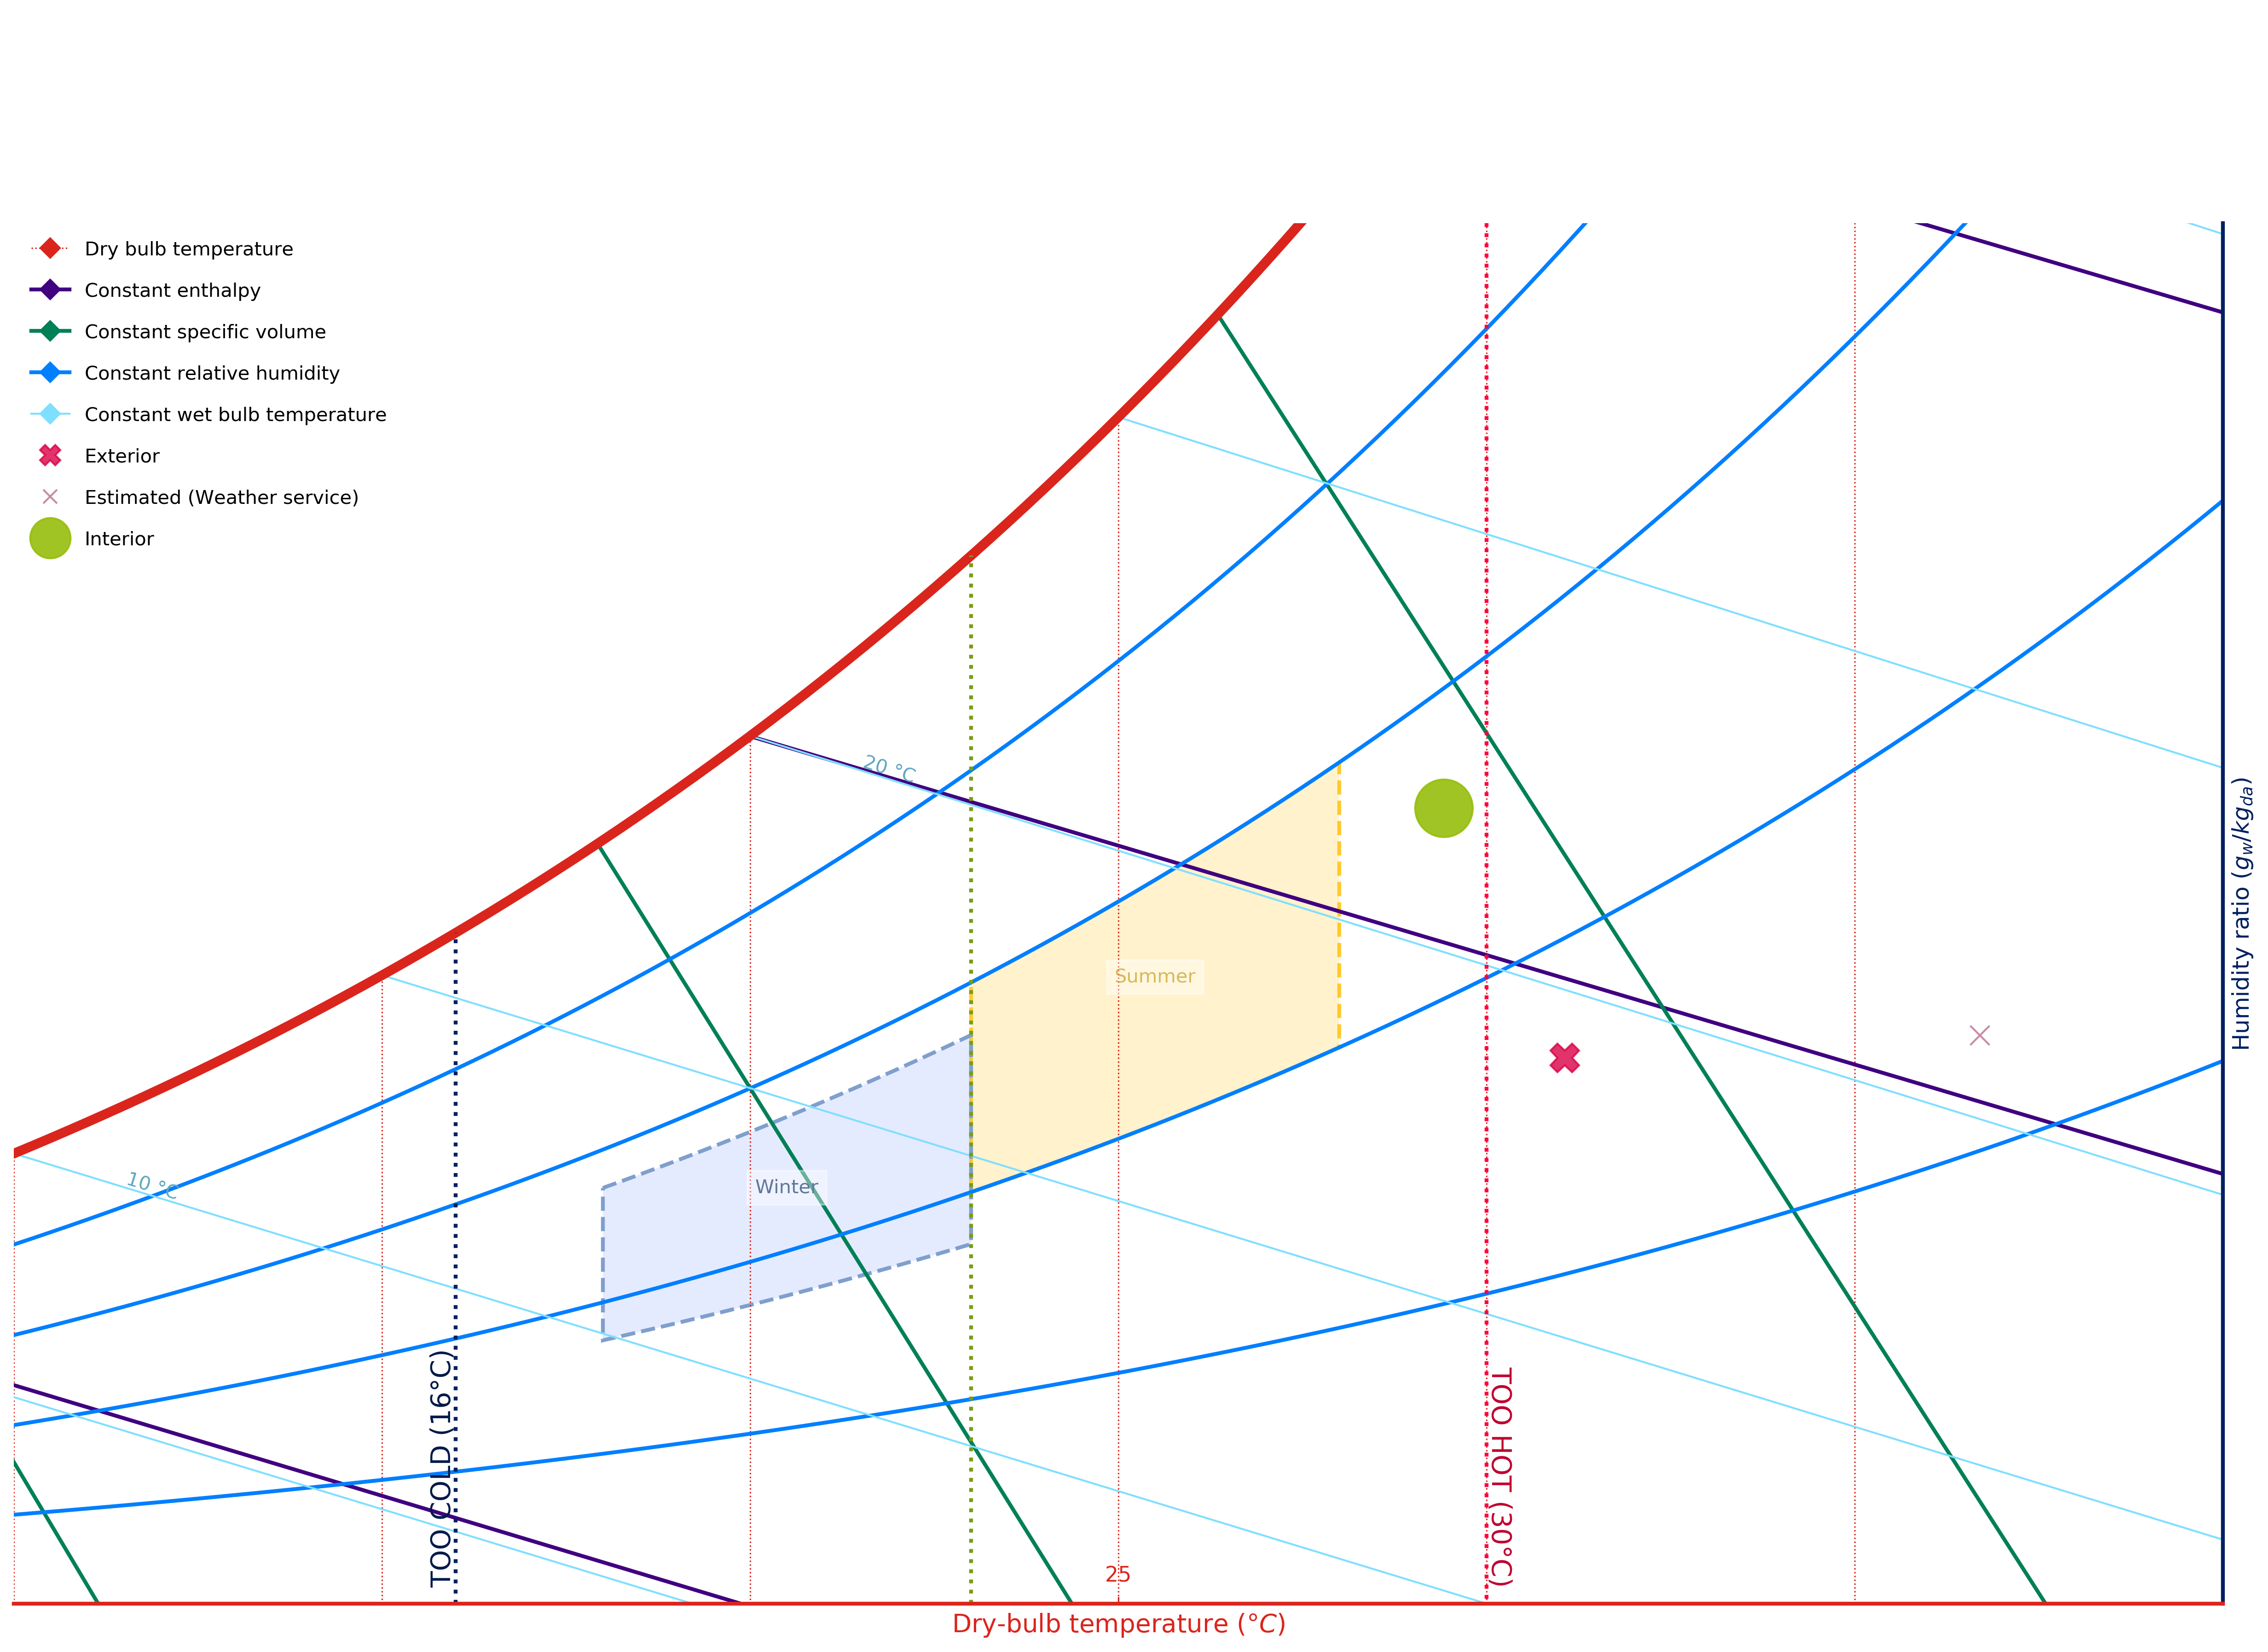

In [51]:
ax.get_figure()

In [48]:
adju_style = {
    "figure": {
        "figsize": [5, 5],
        "base_fontsize": 8,
        "title": "",
#         "x_label": None,
#         "y_label": None,
        "partial_axis": False,
        "x_axis": {"color": [0.0, 0.0, 0.0], "linewidth": 1.5, "linestyle": "-"},
        "x_axis_labels": {"color": [0.0, 0.0, 0.0], "fontsize": 6},
        "x_axis_ticks": {"direction": "out", "color": [0.0, 0.0, 0.0]},
        "y_axis": {"color": [0.0, 0.0, 0.0], "linewidth": 1.5, "linestyle": "-"},
        "y_axis_labels": {"color": [0.0, 0.0, 0.0], "fontsize": 6},
        "y_axis_ticks": {"direction": "out", "color": [0.0, 0.0, 0.0]},
    },
    "limits": {
        "range_temp_c": [10, 50],
        "range_humidity_g_kg": [0, 25],
        "altitude_m": 900,
        "step_temp": .5
    },
    "saturation": {"color": [0, 0, 0], "linewidth": 1}, #Saturation line
    "constant_rh": {"color": [0.0, 0.498, 1.0, .7], "linewidth": 2.5,
                    "linestyle": ":"},
    "constant_h": {"color":[0,0.1,0.2,0.35], "linewidth": 1.5, "linestyle":":"},
    "chart_params": {
        "with_constant_rh": True,
        "constant_rh_curves": [10, 25, 50, 75],
        "constant_rh_labels": [10, 25, 50, 75],
        
        "range_vol_m3_kg": [0.9, 1.],
        "constant_v_labels": [0.9, 0.94, 0.98],
        "with_constant_v": False,
        "with_constant_wet_temp": False,
        "with_constant_dry_temp": False,
        "with_constant_humidity": False,
        
        "with_constant_h": True,
        "with_constant_wet_temp": False,
        "with_zones": False
    }
}

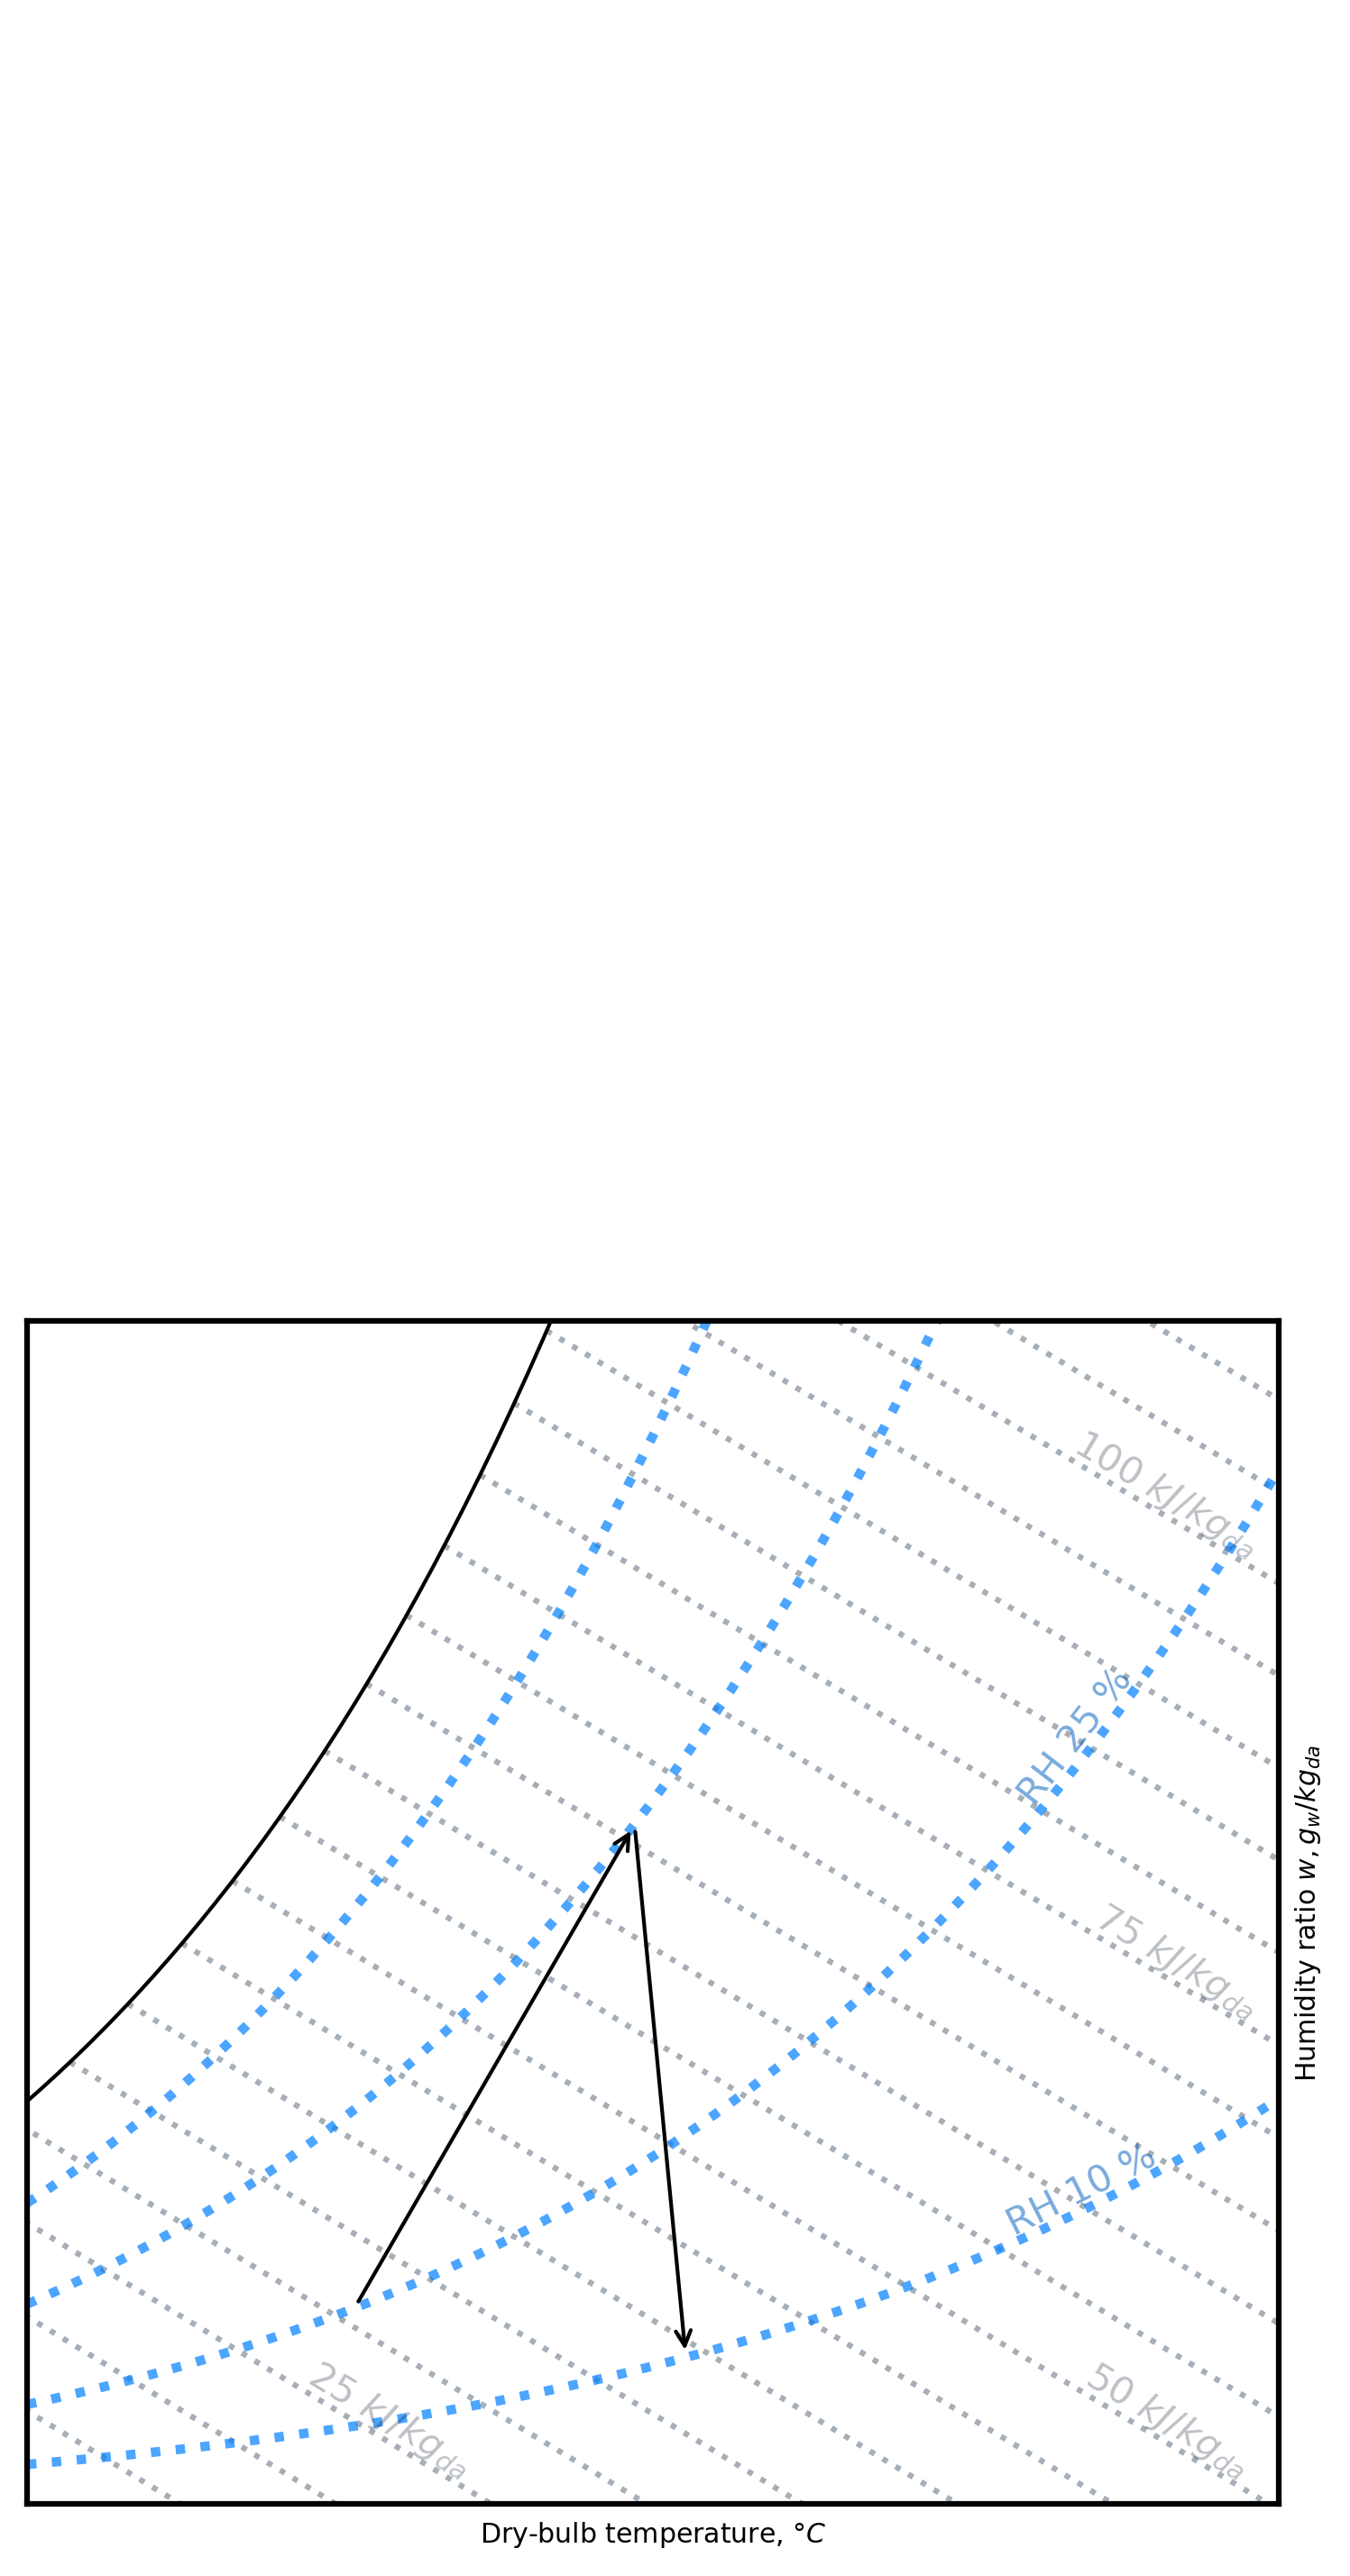

In [49]:
chart = PsychroChart(adju_style)
ax = chart.plot()
update(chart,A,B)
update(chart,B,C)
ax.get_figure()

In [48]:
points['exterior']

{'label': 'Exterior',
 'style': {'color': [0.855, 0.004, 0.278, 0.8],
  'marker': 'X',
  'markersize': 7},
 'xy': (31.06, 10)}

In [15]:
chart_custom_2._fig.savefig('test.png',dpi=150) #Appears to be the only way to save the resulting figure? 